In [1]:
from elecmarket import *
import os as os
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

np.random.seed(42)

In [2]:
scenario_name = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 03 - MFG planner\Results\test"
cp = getpar("common_params.py")
cagents = [Conventional('Coal', cp, getpar('coal.py')),
          Conventional('Gas', cp, getpar('gas.py'))]

ragents = [Renewable('Wind', cp, getpar('renewable.py'))]

Niter = cp['iterations']
tol = cp['tolerance']

sim = Simulation(cagents,ragents,cp)

start_simu = time.time()

###################### Version MFG ######################

conv, elapsed, Nit, mfg_prices, mfg_revenues = sim.run(Niter, tol, cp['power'], cp['offset'])

print("MFG Revenues: ", mfg_revenues)
print('Elapsed time: ', elapsed/60)


Iteration 0
Weight: 0.2759; Wind: 2246676.16; Coal: 1060900.11; Gas: 1976243.39; Total: 5283819.66
Iteration 1
Weight: 0.2385; Wind: 399473.72; Coal: 151817.05; Gas: 263800.75; Total: 815091.52
Iteration 2
Weight: 0.2108; Wind: 74783.81; Coal: 3815.07; Gas: 8899.22; Total: 87498.10
Iteration 3
Weight: 0.1895; Wind: 45959.20; Coal: 1320.47; Gas: 7309.38; Total: 54589.05
Iteration 4
Weight: 0.1724; Wind: 32846.55; Coal: 1676.98; Gas: 6388.33; Total: 40911.86
Iteration 5
Weight: 0.1585; Wind: 24662.80; Coal: 1704.03; Gas: 5586.40; Total: 31953.23
Iteration 6
Weight: 0.1469; Wind: 18518.32; Coal: 1622.43; Gas: 4926.50; Total: 25067.25
Iteration 7
Weight: 0.1370; Wind: 14429.68; Coal: 1464.23; Gas: 4319.62; Total: 20213.53
Iteration 8
Weight: 0.1285; Wind: 12183.60; Coal: 1173.28; Gas: 3606.56; Total: 16963.44
Iteration 9
Weight: 0.1211; Wind: 10569.05; Coal: 915.81; Gas: 2996.29; Total: 14481.15
Iteration 10
Weight: 0.1146; Wind: 9391.64; Coal: 645.94; Gas: 2441.61; Total: 12479.18
Iterati

In [3]:
out = sim.write(scenario_name)

try:
    os.mkdir(scenario_name)
except FileExistsError:
    print('Directory already exists')
os.system("cp common_params.py "+scenario_name+"/common_params.py")

# parameter files are copied to output directory; change this if you change agent types
os.system("cp coal.py "+scenario_name+"/coal.py")
os.system("cp gas.py "+scenario_name+"/gas.py")
os.system("cp renewable.py "+scenario_name+"/renewable.py")
#os.system("cp pv.py "+scenario_name+"/pv.py")
os.system("cp "+scenario_name+'.csv '+scenario_name+"/"+scenario_name+".csv")


Directory already exists


1

In [4]:
# Years for tick marks
years = list(range(2021, 2021 + cp['tmax']))  # Years from 2024 to 2040

# Creating a DataFrame for easy plotting with seaborn
df = pd.DataFrame({
    'Year': out['time'],
    'Peak Price': out['peak price'],
    'Offpeak Price': out['offpeak price'],
    'Coal Capacity': out['Coal capacity'], #Conv GW
    'Gas Capacity': out['Gas capacity'], #Conv GW
    'Wind Capacity': out['Wind capacity'], #Conv GW
    'Coal Price': out['Fuel 0'],
    'Gas Price': out['Fuel 1'],
    'Peak Demand': sim.pdemand, #Conv GW
    'Offpeak Demand': sim.opdemand, #Conv GW
    'Coal Offpeak Supply': out['Coal offpeak supply'], #Conv GWh
    'Gas Offpeak Supply': out['Gas offpeak supply'], #Conv GW
    'Wind Offpeak Supply': out['Wind offpeak supply'], #Conv GW
    'Coal Peak Supply': out['Coal peak supply'], #Conv GW
    'Gas Peak Supply': out['Gas peak supply'], #Conv GW
    'Wind Peak Supply': out['Wind peak supply'], #Conv GW
})

df['Year'] = df['Year'].map(lambda x: 2021 + x)

print(df)

            Year  Peak Price  Offpeak Price  Coal Capacity  Gas Capacity  \
0    2021.000000   65.941631      63.496302      35.000091     29.999872   
1    2021.084034   57.063102      50.646466       2.642296     16.317987   
2    2021.168067   56.643139      49.548747       2.200834     15.864431   
3    2021.252101   52.786254      44.715470       0.238151     15.322039   
4    2021.336134   48.689126      36.154074       0.181623     15.098473   
..           ...         ...            ...            ...           ...   
115  2030.663866   61.005620      48.961857       0.038471     12.075560   
116  2030.747899   66.065936      54.070339       0.038461     12.064455   
117  2030.831933   74.288624      59.698438       0.038457     12.056916   
118  2030.915966  104.237765      67.844800       0.038457     12.054363   
119  2031.000000   95.334681      66.963117       0.038425     11.983117   

     Wind Capacity  Coal Price  Gas Price  Peak Demand  Offpeak Demand  \
0        54.9

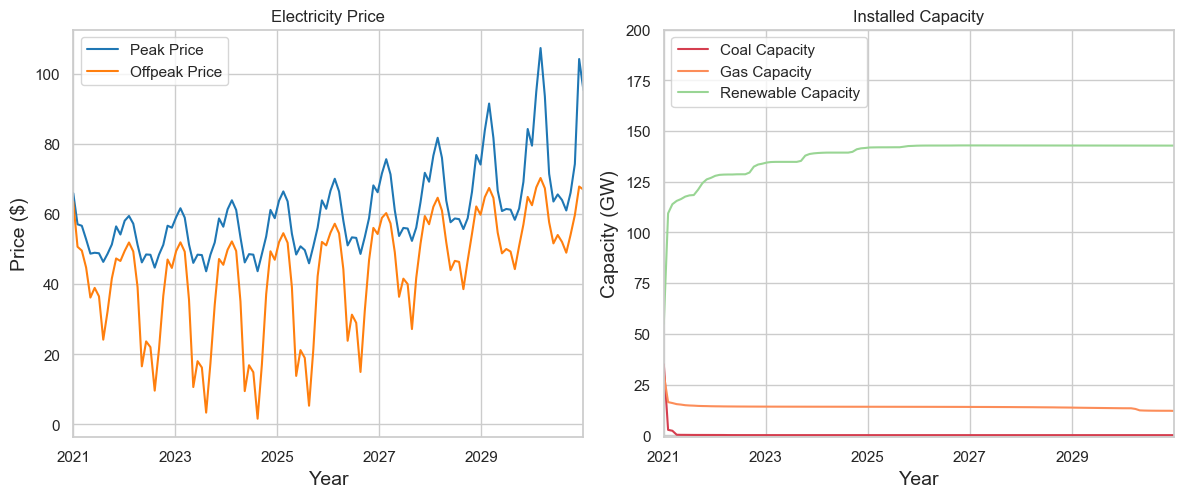

In [5]:

# Setting the style and context for seaborn
sns.set(style="whitegrid")

# Define the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the electricity prices with seaborn
sns.lineplot(ax=axes[0], x='Year', y='Peak Price', data=df, label='Peak Price', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Price', data=df, label='Offpeak Price', color='tab:orange')

axes[0].set_ylabel('Price ($)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_xlim(2021, 2021+cp['tmax'])
axes[0].legend()

# Set x-axis ticks to display every other year for less clutter
tick_indices = range(2021, 2021+cp['tmax'], 2)  # This skips every other year
axes[0].set_xticks(tick_indices)

# Plotting the capacity for each agent type with seaborn
sns.lineplot(ax=axes[1], x='Year', y='Coal Capacity', data=df, label='Coal Capacity', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Capacity', data=df, label='Gas Capacity', color='#fc8d59')
sns.lineplot(ax=axes[1], x='Year', y='Wind Capacity', data=df, label='Renewable Capacity', color='#99d594')
axes[1].set_ylabel('Capacity (GW)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylim(-1, 200)
axes[1].set_xlim(2021, 2021+cp['tmax'])
axes[1].legend(loc='upper left')

# Apply the same x-axis settings to the second subplot
axes[1].set_xticks(tick_indices)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/" + 'price_capacity.pdf', format='pdf')
axes[0].set_title('Electricity Price')
axes[1].set_title('Installed Capacity')
# Show the plot (optional, can be removed if only saving is needed)
plt.show()


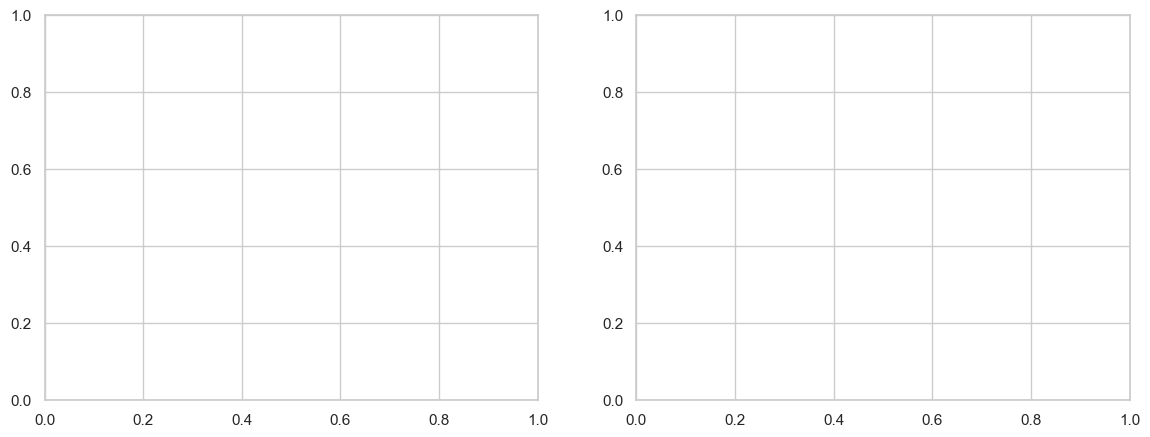

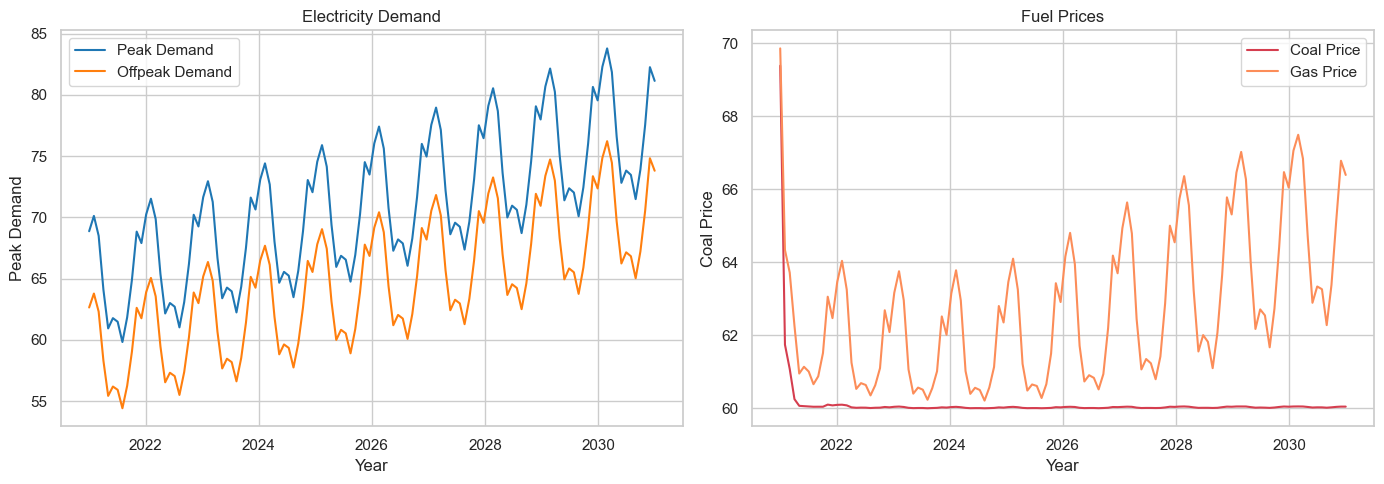

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting demand
sns.lineplot(ax=axes[0], x='Year', y='Peak Demand', data=df, label='Peak Demand', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Demand', data=df, label='Offpeak Demand', color='tab:orange')
axes[0].set_title('Electricity Demand')
axes[0].legend()

# Plotting fuel prices
sns.lineplot(ax=axes[1], x='Year', y='Coal Price', data=df, label='Coal Price', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Price', data=df, label='Gas Price', color='#fc8d59')
axes[1].set_title('Fuel Prices')
axes[1].legend()

plt.tight_layout()
plt.savefig(scenario_name + "/demand_fuelprice.pdf", format='pdf')
plt.show()


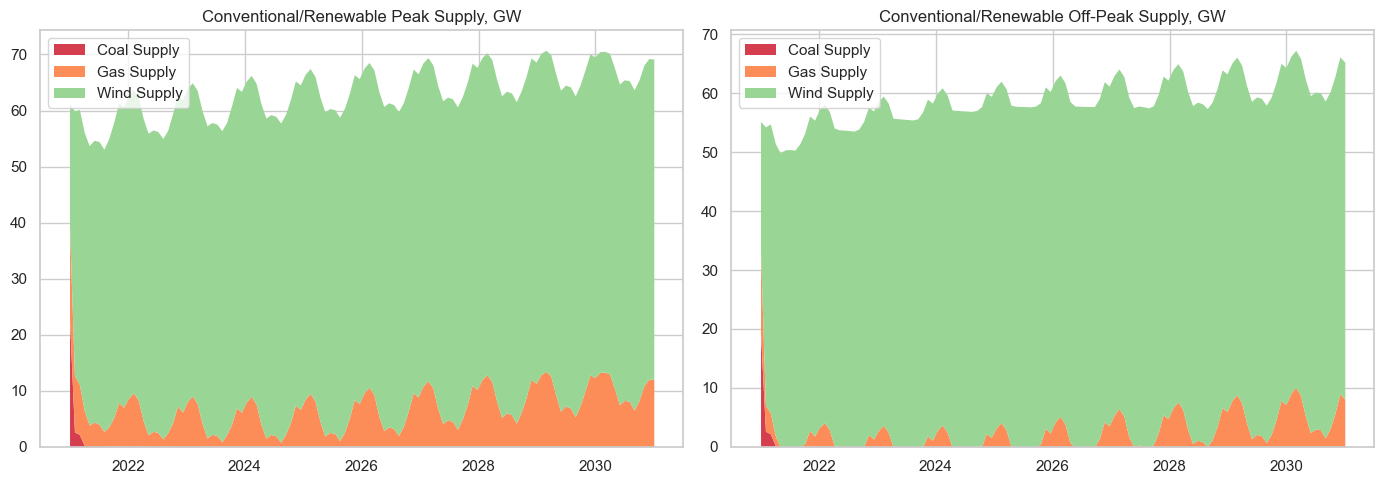

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting peak supply with stackplot
axes[0].stackplot(df['Year'], df['Coal Peak Supply'], df['Gas Peak Supply'], df['Wind Peak Supply'],
                  labels=['Coal Supply', 'Gas Supply', 'Wind Supply'],
                  colors=['#d53e4f', '#fc8d59', '#99d594'], linewidth=0)
axes[0].set_title('Conventional/Renewable Peak Supply, GW')
axes[0].legend(loc='upper left')

# Plotting off-peak supply with stackplot
axes[1].stackplot(df['Year'], df['Coal Offpeak Supply'], df['Gas Offpeak Supply'], df['Wind Offpeak Supply'],
                  labels=['Coal Supply', 'Gas Supply', 'Wind Supply'],
                  colors=['#d53e4f', '#fc8d59', '#99d594'], linewidth=0)
axes[1].set_title('Conventional/Renewable Off-Peak Supply, GW')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig(scenario_name + "/supply.pdf", format='pdf')
plt.show()

In [8]:
# print("############### Planner Version ###############")
#
# initial_prices = np.random.rand(2 * sim.Nt + sim.Nfuels * sim.Nt)*10
#
# planner_objective, sim.Prp, sim.Prop, sim.fPrice = sim.optimizePrices(mfg_prices)
#
# end_simu = time.time()
#
# print("Time: ", end_simu-start_simu, "s")
#
# out = sim.write(scenario_name)
#
# try:
#     os.mkdir(scenario_name)
# except FileExistsError:
#     print('Directory already exists')
# os.system("cp common_params.py "+scenario_name+"/common_params.py")
#
# # parameter files are copied to output directory; change this if you change agent types
# os.system("cp coal.py "+scenario_name+"/coal.py")
# os.system("cp gas.py "+scenario_name+"/gas.py")
# os.system("cp renewable.py "+scenario_name+"/renewable.py")
#
# os.system("cp "+scenario_name+'.csv '+scenario_name+"/"+scenario_name+".csv")
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
# plt.plot(2025+out['time'], out['peak price'], label='peak price')
# plt.plot(2025+out['time'], out['offpeak price'], label='offpeak price')
# plt.legend()
# plt.title('Electricity price (Planner)')
# plt.subplot(122)
#
# # Plotting the capacity for each agent type; modify this if you change agent types
# plt.plot(2025+out['time'], out['Coal capacity'], label='Coal capacity')
# plt.plot(2025+out['time'], out['Gas capacity'],label='Gas capacity')
# plt.plot(2025+out['time'], out['Renewable capacity'], label='Renewable capacity')
# plt.legend()
# plt.title('Installed capacity (Planner)')
# plt.savefig(scenario_name+"/"+'price_capacity.pdf', format='pdf')
#
# plt.figure(figsize=(14, 5))
# plt.subplot(121)
# plt.plot(2025+out['time'], sim.pdemand, label='peak demand')
# plt.plot(2025+out['time'], sim.opdemand, label='offpeak demand')
# plt.legend()
# plt.title('Electricity demand (Planner)')
# plt.subplot(122)
#
# # Plotting the fuel prices; modify this if you change fuel types
# plt.plot(2025+out['time'], out['Fuel 0'], label='Coal price')
# plt.plot(2025+out['time'], out['Fuel 1'], label='Gas price')
# plt.legend()
# plt.title('Fuel price (Planner)')
# #plt.plot(2025+out['time'],np.interp(out['time'],cp["carbon tax"][0],cp["carbon tax"][1]))
# plt.savefig(scenario_name+"/"+'demand_fuelprice.pdf',format='pdf')
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
#
# # Plotting the supply for each agent; modify this if you change agent types
# plt.bar(2025+out['time'],out['Coal peak supply'],width=0.25,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas peak supply'],width=0.25,
#         bottom=out['Coal peak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable peak supply'],width=0.25,
#         bottom=out['Gas peak supply']+out['Coal peak supply'],label='Renewable supply')
# #plt.ylim([0,80])
# plt.title('Conventional/ renewable peak supply, GW (Planner)')
# plt.legend()
# plt.subplot(122)
# plt.bar(2025+out['time'],out['Coal offpeak supply'],width=0.5,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas offpeak supply'],width=0.25,
#         bottom=out['Coal offpeak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable offpeak supply'],width=0.25,
#         bottom=out['Gas offpeak supply']+out['Coal offpeak supply'],label='Renewable supply')
#
# plt.title('Conventional/ renewable off-peak supply, GW (Planner)')
#
# #plt.ylim([0,80])
#
# plt.legend()
# plt.savefig(scenario_name+"/"+'supply.pdf',format='pdf')
# plt.show()
#
#
